In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset = pd.read_csv(r"C:\KR\work\Programming\kaggle_competitions\red_vine_quality\classification\winequality-red.csv")

In [7]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


no missing value


In [9]:
dataset['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [10]:
dataset.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

moderate positive relationship between alcohol and quality

negative moderate relationship between volatile acidity and quality

### drop duplicates


In [11]:
dataset.duplicated().sum()

np.int64(240)

In [12]:
dataset.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### identifying outliers 


In [13]:
for col in dataset.columns:
    print(col)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


<Axes: ylabel='alcohol'>

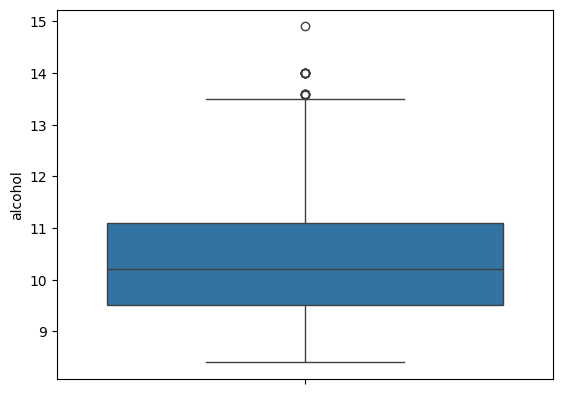

In [14]:
sns.boxplot(dataset['alcohol'])

<Axes: ylabel='volatile acidity'>

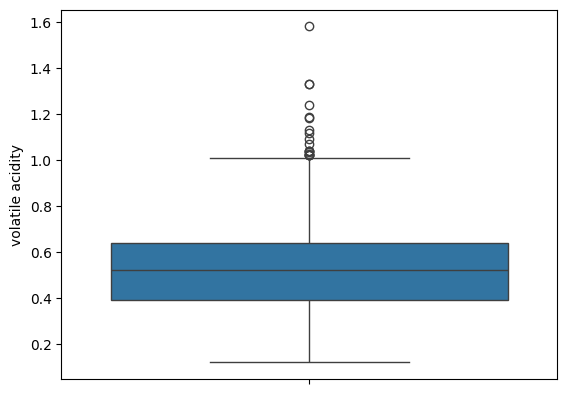

In [15]:
sns.boxplot(dataset['volatile acidity'])

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
dataset_values = pd.read_csv('winequality-red.csv')


In [18]:
X = dataset_values.drop('quality' , axis = 1)
X.values

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]],
      shape=(1599, 11))

In [19]:
y = dataset_values['quality']
y = (y>=6).astype(int)
y.values

array([0, 0, 0, ..., 1, 0, 1], shape=(1599,))

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X , y , stratify= y , random_state=42)

In [21]:
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [24]:
model_logr = LogisticRegression(max_iter=500)
model_logr.fit(X_train_scaled , y_train)
t_pred_logr = model_logr.predict(X_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

In [26]:
print(accuracy_score(y_test, t_pred_logr))

0.735


In [27]:
print(classification_report(y_test, t_pred_logr))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       186
           1       0.75      0.75      0.75       214

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.74      0.73      0.74       400



In [28]:
matrix = confusion_matrix(y_test, t_pred_logr)
cm_df = pd.DataFrame(matrix, index=['actual bad' , 'actual good'], columns=['predicted bad' , 'predicted good'])
cm_df

,predicted bad,predicted good
actual bad,134,52
actual good,54,160


In [29]:
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train_scaled , y_train)
y_pred_KNN = model_KNN.predict(X_test_scaled)


In [30]:
print(accuracy_score(y_test, y_pred_KNN))

0.7425


In [31]:
matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
matrix_KNN_df = pd.DataFrame(matrix_KNN , index=['actual bad' , 'actual good'], columns=['predicted bad' , 'predicted good'])
matrix_KNN_df

,predicted bad,predicted good
actual bad,131,55
actual good,48,166


In [32]:
model_svm = SVC(kernel='rbf')
model_svm.fit(X_train_scaled , y_train)
y_pred_svm = model_svm.predict(X_test_scaled)

In [33]:
print(accuracy_score(y_test, y_pred_svm))

0.755


In [34]:
matrix_svm = confusion_matrix(y_test, y_pred_svm)
matrix_svm_df = pd.DataFrame(matrix_svm, index=['actual bad', 'actual good'] , columns=['predicted bad', 'predicted good'])
matrix_svm_df

,predicted bad,predicted good
actual bad,143,43
actual good,55,159


In [35]:
model_logr.coef_.shape

(1, 11)

In [36]:
model_logr.coef_[0]

array([ 0.38055959, -0.5924672 , -0.31490026,  0.1255451 , -0.15755739,
        0.24302987, -0.57775226, -0.18757985, -0.01816033,  0.48213736,
        0.83543949])

In [37]:
weights = pd.Series(model_logr.coef_[0] , index= X.columns).sort_values()

In [38]:
weights

volatile acidity       -0.592467
total sulfur dioxide   -0.577752
citric acid            -0.314900
density                -0.187580
chlorides              -0.157557
pH                     -0.018160
residual sugar          0.125545
free sulfur dioxide     0.243030
fixed acidity           0.380560
sulphates               0.482137
alcohol                 0.835439
dtype: float64